# Competency Based Curriculum Chatbot Project 

## Overview

This project involved building a chatbot to  automate responses for the new education system in Kenya (CBC), assisting  students, parents, and educators with curriculum details, assessments, and policies. It enhances engagement, provides instant information, and simplifies learning pathways using AI-driven conversational support tailored to user needs.

## Business Understanding

The Competency-Based Curriculum (CBC) in Kenya is designed to equip learners with practical skills, but its implementation has faced challenges. Parents, teachers, and students often struggle to access accurate and timely information regarding the curriculum, assessment methods, and their respective roles. Currently, most CBC-related inquiries rely on government circulars, school meetings, or online discussions, which are often fragmented and inconsistent.

To address this, an AI-powered chatbot will be developed to provide instant, reliable, and structured responses to CBC-related questions. This chatbot will serve as an interactive platform where users can seek information about curriculum structure, assessment criteria, parental involvement, and available teaching resources. The goal is to enhance accessibility, reduce misinformation, and improve user engagement by leveraging natural language processing (NLP) for dynamic, intelligent responses.

## Data Understanding
To ensure the chatbot delivers relevant and accurate responses, data will be gathered from multiple sources. Official curriculum documents from the Kenya Institute of Curriculum Development (KICD) will serve as the primary data source, supplemented by Ministry of Education policies, circulars, and guidelines. 
The data will primarily be text-based, comprising structured content from official documents and unstructured conversations from forums and user queries. 

## Objectives
1. To develop a chatbot that leverages TF-IDF and Cosine Similarity to match user queries with relevant responses, while utilizing Random Forest/XGBoost to rank and optimize the best possible answers, ensuring accurate and efficient query resolution

2. To analyze the question column in the FAQS dataset to identify the most frequently asked queries and common keywords, enabling optimization of chatbot responses and improving user query resolution.

3. To apply an NLP-based sentiment analysis approach using VADER and TextBlob to classify CBC-related tweets as positive, negative, or neutral, providing strategic insights into the education system.

4. To analyze sentiment trends in tweets about the CBC education system, providing actionable insights to support strategic decision-making for policy development, curriculum improvements, and stakeholder engagement 

5. To build and evaluate predictive models (Random Forest, XGBoost, and Logistic Regression) for sentiment classification, comparing their performance in accurately classifying CBC-related tweets.


In [82]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf


warnings.filterwarnings('ignore')
from collections import Counter

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import nltk

nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import random
import string
import nltk

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[

In [2]:
# Loading the FAQS dataset
data = pd.read_csv("FAQS.csv")
data

,Question,Answer
0,What are the main objectives of the Competency...,The CBC aims to equip learners with practical ...
1,How does CBC differ from the 8-4-4 education s...,"Unlike 8-4-4, which focused on exams and conte..."
2,What are the key levels in the CBC structure?,CBC is divided into three main levels: Early Y...
3,What role do parents play in CBC?,Parents are actively involved in their child's...
4,How is learner progress assessed under CBC?,Assessment is continuous and includes practica...
...,...,...
2528,Are learners required to repeat grades under CBC?,"No, CBC focuses on competency-based progressio..."
2529,Which learning resources are essential for CBC?,"CBC students need approved textbooks, workbook..."
2530,What books and resources are needed for CBC st...,CBC learners require textbooks and workbooks t...
2531,What educational materials do CBC students need?,Students in CBC must have KICD-approved textbo...


In [3]:
# Loading the tweets dataset
tweets = pd.read_csv("merged_dataset_Twitter.csv")
tweets

,Tweet_count,Username,Text,Created At,Retweets,Likes
0,1,Edtech East Africa,"Let’s Talk Monday: EdTech Edition!\nParents, d...",Mon Jan 20 07:20:46 +0000 2025,1,3
1,2,Edtech East Africa,Let’s Talk Monday: #EdTechMonday\n\nWith Kenya...,Mon Jan 27 08:45:00 +0000 2025,1,0
2,3,unknown,Education reforms under CBC are revolutionizin...,Mon Jan 20 09:16:39 +0000 2025,0,0
3,4,Kenya Girl Guides Association,Betty Kirui shares how the CBC education syste...,Mon Dec 16 07:32:44 +0000 2024,1,2
4,5,His/Him/He,The shift from 8-4-4 to CBC reflects Kenya's c...,Mon Jan 20 09:16:27 +0000 2025,0,0
...,...,...,...,...,...,...
1081,220,Lindah Oguttu aka Mtu ya mjengo,Someone here @wmnjoya once said CBC is for the...,Sun Jan 19 14:14:51 +0000 2020,237,1066
1082,221,#LandIsNotProperty Mwalimu Wandia,The reason we went along with CBC is POLITICAL...,Sun May 29 03:58:22 +0000 2022,123,248
1083,222,Sewe Saldanha,The guys who designed CBC send their kids to I...,Tue Sep 07 03:47:02 +0000 2021,220,504
1084,223,Samira Sawlani,I have been in Kenya 2 months- people I meet (...,Wed Nov 16 16:41:23 +0000 2022,115,484


In [4]:
# Check the info in the FAQS dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  2533 non-null   object
 1   Answer    2533 non-null   object
dtypes: object(2)
memory usage: 39.7+ KB


This dataset has 2,533 entries and 2 columns (Question, Answer), both containing text data (object type) with no missing values.

In [5]:
#Describing the FAQS dataset
data.describe()

,Question,Answer
count,2533,2533
unique,1897,2145
top,What impact does CBC have on creativity?,"CBC focuses on hands-on learning, critical thi..."
freq,7,5


* There are 2,533 rows, meaning the dataset contains 2,533 FAQ pairs (each with a question and answer).
Unique Values

* Question column has 1,897 unique values:
* Answers column has 2,144 unique values:
* The most common question is "How does CBC promote civic responsibility?", appearing 7 times in the dataset.
* The most common answer is "Unlike traditional systems, CBC prioritizes co...", appearing 5 times in the dataset.
* The most common question appears 7 times, indicating that users frequently ask about CBC and civic responsibility.
* The most common answer appears 5 times, suggesting that some questions share a similar response.

In [6]:
# Check the info in the FAQS dataset
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweet_count  1086 non-null   int64 
 1   Username     1086 non-null   object
 2   Text         1086 non-null   object
 3   Created At   1086 non-null   object
 4   Retweets     1086 non-null   int64 
 5   Likes        1086 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 51.0+ KB


This dataset contains 1,086 rows and 6 columns with no missing values.

Columns & Data Types:
- Tweet_count, Retweets, Likes → Integer (int64) (numeric values)
- Username, Text, Created At → Object (string/text data)

In [7]:
#Describing the tweeets columns
tweets.describe()

,Tweet_count,Retweets,Likes
count,1086.000000,1086.000000,1086.000000
mean,111.337017,65.476980,313.256906
std,66.098646,231.677925,895.040384
min,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000
50%,109.000000,5.000000,19.000000
75%,164.000000,39.000000,248.750000
max,251.000000,2451.000000,10281.000000


The dataset contains 1,086 tweets with high variability in engagement. Some tweets have zero likes/retweets, while top tweets reach 2,451 retweets and 10,281 likes. Most tweets get low engagement (median: 5 retweets, 19 likes).

## Data cleaning

### Accuracy

In [8]:
#Checkinng for nulls in the FAQS datasets
data.isna().sum()

Question    0
Answer      0
dtype: int64

There are no null values in the FAQS dataset.

In [9]:
#Checking for duplicates in the FAQS dataset
data.duplicated().sum()

360

There are 360 duplicates in the FAQS dataset.

In [10]:
# Calculating the percentage of duplicates
duplicate_percentage = (data.duplicated().sum() / len(data)) * 100
duplicate_percentage

14.21239636794315

Since duplicates make up only 14.25% of the FAQs dataset, they are relatively small. Dropping them will ensure unique responses, improving chatbot efficiency and preventing redundant answers

In [11]:
# Checking for null values in the tweets dataset
tweets.isna().sum()

Tweet_count    0
Username       0
Text           0
Created At     0
Retweets       0
Likes          0
dtype: int64

There are no null values in the tweets data

In [12]:
# Checking for duplicates in the tweets dataset
tweets.duplicated().sum()

12

There are 12 duplicates in the tweets dataset

In [13]:
# Calculating the percentage of duplicates
duplicate_percentage_tweets = (tweets.duplicated().sum() / len(tweets)) * 100
duplicate_percentage_tweets

1.1049723756906076

Since duplicates make up only 1.105% of the tweets dataset, they are relatively small. Dropping them will ensure unique responses, improving chatbot efficiency and preventing redundant answers

### Validity

In [14]:
# Convert 'Created At' column to datetime format
tweets['Created At'] = pd.to_datetime(tweets['Created At'])

# Extract the year
tweets['Year'] = tweets['Created At'].dt.year

# Display the modified DataFrame
tweets.head()

,Tweet_count,Username,Text,Created At,Retweets,Likes,Year
0,1,Edtech East Africa,"Let’s Talk Monday: EdTech Edition!\nParents, d...",2025-01-20 07:20:46+00:00,1,3,2025
1,2,Edtech East Africa,Let’s Talk Monday: #EdTechMonday\n\nWith Kenya...,2025-01-27 08:45:00+00:00,1,0,2025
2,3,unknown,Education reforms under CBC are revolutionizin...,2025-01-20 09:16:39+00:00,0,0,2025
3,4,Kenya Girl Guides Association,Betty Kirui shares how the CBC education syste...,2024-12-16 07:32:44+00:00,1,2,2024
4,5,His/Him/He,The shift from 8-4-4 to CBC reflects Kenya's c...,2025-01-20 09:16:27+00:00,0,0,2025


### Completeness

In [15]:
#Dropping irrelevant columns for the tweets dataset
columns = tweets[["Tweet_count", "Username", "Created At"]]
tweets = tweets.drop(columns, axis = 1)
#displaying the columns
tweets.head()

,Text,Retweets,Likes,Year
0,"Let’s Talk Monday: EdTech Edition!\nParents, d...",1,3,2025
1,Let’s Talk Monday: #EdTechMonday\n\nWith Kenya...,1,0,2025
2,Education reforms under CBC are revolutionizin...,0,0,2025
3,Betty Kirui shares how the CBC education syste...,1,2,2024
4,The shift from 8-4-4 to CBC reflects Kenya's c...,0,0,2025


**Checking for outliers**

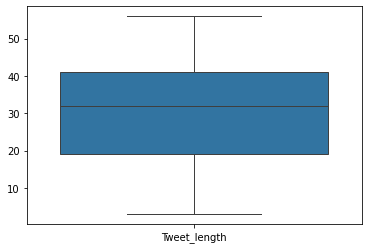

In [16]:
# Checking for outliers for categorical columns in the tweets 
# Compute word count for tweets
tweets['Tweet_length'] = tweets['Text'].apply(lambda x: len(x.split()))

# Boxplot of text lengths
sns.boxplot(data=tweets[['Tweet_length']])
plt.show()

There are no outliers in the tweets dataset

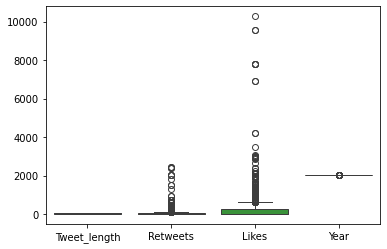

In [17]:
# Plot boxplots for numerical column to check for outliers for the tweet dataset
sns.boxplot(data=tweets[['Tweet_length','Retweets', 'Likes', 'Year']])
plt.show()


- Tweet_length: Data is concentrated near the lower end with a small range and no outliers.
  
- Retweets: Larger data spread with some outliers indicating a few tweets received significantly more retweets.

- Likes: Wide data range with many outliers; some tweets received up to nearly 10,000 likes.

- Year: Narrow data range, indicating minimal variation around a specific year with no outliers.

The tweets dataset displays to have outliers for retweets and likes columns. The outliers will not be dropped since outliers in the tweets represent real user engagements. Keeping them will ensure that the analysis employs diverse inputs, improving recommendation accuracy and generalization without losing important contextual variations.

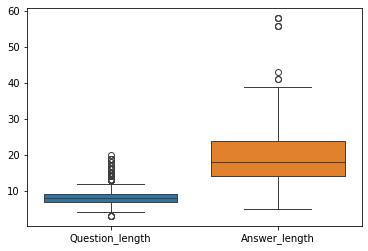

In [18]:
# Checking for outliers for categorical columns in the FAQS datasets
# Compute word count for question and answer columns
data['Question_length'] = data['Question'].apply(lambda x: len(x.split()))
data['Answer_length'] = data['Answer'].apply(lambda x: len(x.split()))

# Boxplot of question lengths and answer lengths
sns.boxplot(data=data[['Question_length', 'Answer_length']])
plt.show()

The FAQS dataset displays to have outliers for both columns. The outliers will not be dropped since outliers in FAQs represent real user queries, including rare or detailed questions. Keeping them will ensure that the chatbot learns diverse inputs, improving response accuracy and generalization without losing important contextual variations.

### Consistency and Uniformity

In [19]:
# Dropping the duplicates in the FAQS dataset
data = data.drop_duplicates()
data.duplicated().sum()

0

There are no duplicates.All duplicates are dropped in the FAQS dataset

In [20]:
#Checking for datatypes in the FAQS dataset
data.dtypes

Question           object
Answer             object
Question_length     int64
Answer_length       int64
dtype: object

Question → object: Stores text-based questions in string format.

Answer → object: Contains text-based answers corresponding to the questions.

Question_length → int64: Represents the number of words or characters in each question as an integer.

In [21]:
# Displaying the cleaned FAQS dataset
data

,Question,Answer,Question_length,Answer_length
0,What are the main objectives of the Competency...,The CBC aims to equip learners with practical ...,10,18
1,How does CBC differ from the 8-4-4 education s...,"Unlike 8-4-4, which focused on exams and conte...",9,20
2,What are the key levels in the CBC structure?,CBC is divided into three main levels: Early Y...,9,23
3,What role do parents play in CBC?,Parents are actively involved in their child's...,7,17
4,How is learner progress assessed under CBC?,Assessment is continuous and includes practica...,7,18
...,...,...,...,...
2495,What are the academic and training requirement...,CBC teachers need a diploma in education along...,10,20
2496,What credentials should CBC teachers possess?,"To effectively implement CBC, teachers require...",6,14
2497,What are the minimum requirements to teach CBC...,Teachers must complete structured competency-b...,10,15
2516,Which subjects are compulsory in Junior Second...,There are nine compulsory learning areas for J...,9,30


In [22]:
# Dropping the duplicates in the tweets dataset
tweets = tweets.drop_duplicates()
tweets.duplicated().sum()

0

In [23]:
tweets

,Text,Retweets,Likes,Year,Tweet_length
0,"Let’s Talk Monday: EdTech Edition!\nParents, d...",1,3,2025,44
1,Let’s Talk Monday: #EdTechMonday\n\nWith Kenya...,1,0,2025,38
2,Education reforms under CBC are revolutionizin...,0,0,2025,27
3,Betty Kirui shares how the CBC education syste...,1,2,2024,36
4,The shift from 8-4-4 to CBC reflects Kenya's c...,0,0,2025,24
...,...,...,...,...,...
935,IF EDUCATION IS EXPENSIVE THE GATES OF PRISON ...,5,9,2021,48
938,Why is CBC too expensive and demanding for par...,4,39,2021,11
943,Ongoing Grade 3 Assessment: There have been co...,4,5,2019,44
945,Over one-third of our radio shows participants...,0,1,2023,34


There are no duplicates.All duplicates are dropped in the tweets dataset

In [24]:
#Checking for datatypes in the tweets dataset
tweets.dtypes

Text            object
Retweets         int64
Likes            int64
Year             int64
Tweet_length     int64
dtype: object

- Text → object: Contains tweet content in text format.

- Retweets → int64: Stores the number of times a tweet was retweeted as an integer.

- Likes → int64: Represents the number of likes a tweet received as an integer.

- Year → int32: Indicates the year the tweet was posted.

- Tweet_length → int64: Measures the length of the tweet (in characters or words) as an integer.

In [25]:
# Displaying the cleaned tweets dataset
tweets

,Text,Retweets,Likes,Year,Tweet_length
0,"Let’s Talk Monday: EdTech Edition!\nParents, d...",1,3,2025,44
1,Let’s Talk Monday: #EdTechMonday\n\nWith Kenya...,1,0,2025,38
2,Education reforms under CBC are revolutionizin...,0,0,2025,27
3,Betty Kirui shares how the CBC education syste...,1,2,2024,36
4,The shift from 8-4-4 to CBC reflects Kenya's c...,0,0,2025,24
...,...,...,...,...,...
935,IF EDUCATION IS EXPENSIVE THE GATES OF PRISON ...,5,9,2021,48
938,Why is CBC too expensive and demanding for par...,4,39,2021,11
943,Ongoing Grade 3 Assessment: There have been co...,4,5,2019,44
945,Over one-third of our radio shows participants...,0,1,2023,34


# EDA

**1. Checking the distribution of the tweets length, question length and answer length**

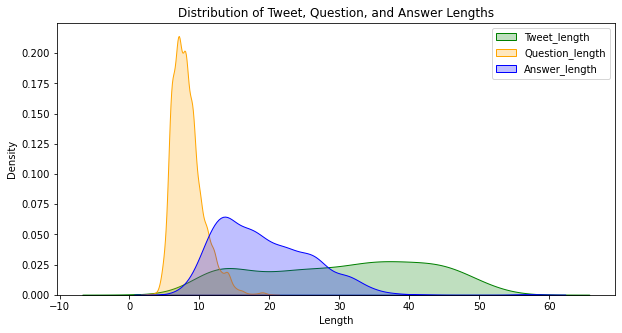

In [26]:
plt.figure(figsize=(10, 5))

sns.kdeplot(data=tweets, x="Tweet_length", label="Tweet_length", fill=True, color="green")
sns.kdeplot(data=data, x="Question_length", label="Question_length", fill=True, color="orange")
sns.kdeplot(data=data, x="Answer_length", label="Answer_length", fill=True, color="blue")

plt.title("Distribution of Tweet, Question, and Answer Lengths")
plt.xlabel("Length")
plt.ylabel("Density")
plt.legend()
plt.show()

- Question Length (Orange): Most questions are short, with a peak below 10 words and few long questions this may be so because they need to be precise and to the point.
- Answer Length (Blue): Answers vary in length, peaking at 10–20 words, with some exceeding 30 words. The Answers are more variable, suggesting that responses depend on the complexity of the question.
- Tweet Length (Green): Tweets have a broad distribution, indicating significant variation, with some being more detailed, which is expected since tweets can be concise or detailed.

**2.To analyze the question column in the FAQS dataset to identify the most frequently asked queries and common keywords**

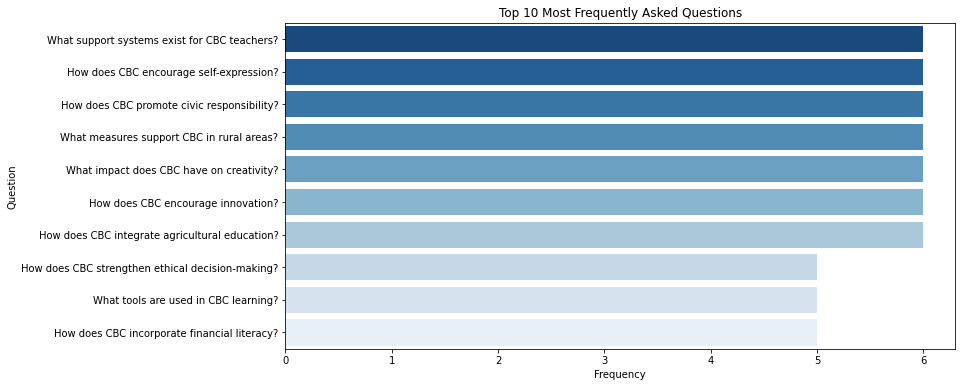

In [27]:
# Top 10 most frequently asked questions
top_questions = data['Question'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_questions.values, y=top_questions.index, palette='Blues_r')
plt.title('Top 10 Most Frequently Asked Questions')
plt.xlabel('Frequency')
plt.ylabel('Question')
plt.show()

The graph displays the top 10 most frequently asked questions about CBC (Competency-Based Curriculum). The most common inquiries focus on self-expression, agricultural education, rural support, creativity, civic responsibility, innovation, teacher support, extracurricular activities, ethical decision-making, and financial literacy, highlighting key concerns in CBC implementation.

**3.Displaying the common words from the questions column**

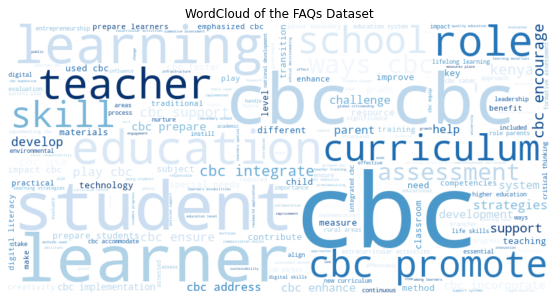

In [29]:

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Lowercase, remove special characters, tokenize, and remove stopwords."""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    words = word_tokenize(text)  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)  # Return as a single string
# Preprocess the text data
data['cleaned_text'] = data['Question'].apply(preprocess_text)

# Combine all text into one large string
text_data = " ".join(data['cleaned_text'])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(text_data)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axis
plt.title("WordCloud of the FAQs Dataset")
plt.show()

The word cloud visualization highlights the most frequently occurring words in the FAQs dataset related to CBC (Competency-Based Curriculum). The larger and bolder the word, the more often it appears in the dataset.

- The most prominent words are "CBC," "learning," "learner," "student," "education," and "teacher"—suggest that discussions mainly focus on students, educators, and learning strategies.

- Other words like "curriculum," "promote," "role," "skill," "grade," "level," and "support" suggest that the FAQs focus on curriculum development, skill enhancement, and educational support within CBC.

**4.To Identify tweets engagement patterns over the years**

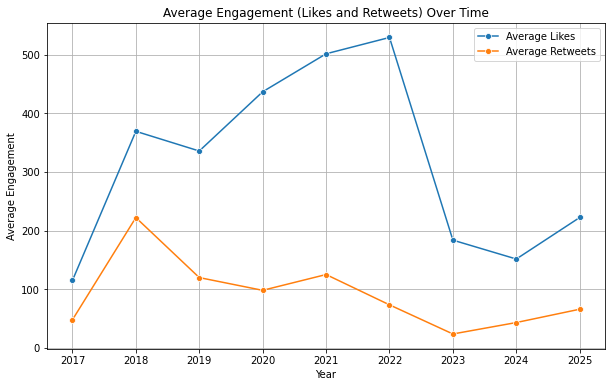

In [30]:
# Grouping by Year and calculating the average Likes and Retweets
avg_engagement = tweets.groupby('Year')[['Likes', 'Retweets']].mean().reset_index()

plt.figure(figsize=(10, 6))

# Plotting average likes over time
sns.lineplot(x='Year', y='Likes', data=avg_engagement, label='Average Likes', marker='o')

# Plotting average retweets over time
sns.lineplot(x='Year', y='Retweets', data=avg_engagement, label='Average Retweets', marker='o')

plt.title('Average Engagement (Likes and Retweets) Over Time')
plt.xlabel('Year')
plt.ylabel('Average Engagement')
plt.legend()
plt.grid(True)
plt.show()


- The graph shows average engagement (likes and retweets) over time from 2017 to 2025. Likes peaked around 2022, followed by a decline, while retweets peaked in 2018 and decreased significantly. Engagement dropped post-2022 but showed slight recovery in 2025.

**5.To display the number of tweets over the years**

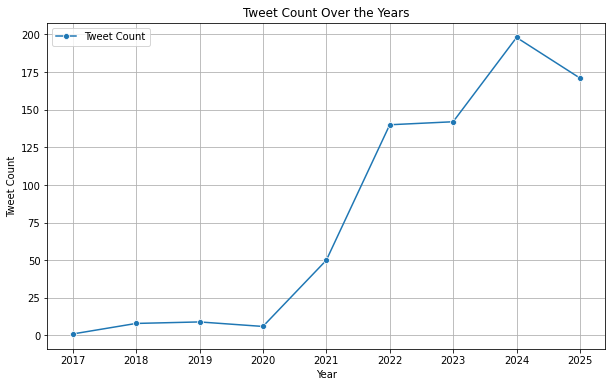

In [31]:
# Grouping by Year and calculating tweet count per year
tweet_count = tweets.groupby('Year')['Text'].count().reset_index()
tweet_count.columns = ['Year', 'Tweet_Count']  

plt.figure(figsize=(10, 6))

# Plotting tweet count over time
sns.lineplot(x='Year', y='Tweet_Count', data=tweet_count, label='Tweet Count', marker='o')
plt.title('Tweet Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Tweet Count')
plt.grid(True)
plt.show()

- The graph represents tweet count over the years (2017-2025). Tweet activity remained low until 2020, then surged significantly, peaking in 2024. A slight decline is observed in 2025, but overall, engagement remains high.

**6.To examine the relationship between retweets and likes on tweets**

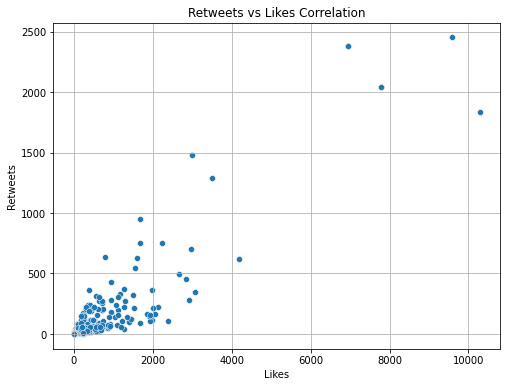

Correlation between Likes and Retweets: 0.9175776970837106


In [32]:
# Calculating the correlation between Likes and Retweets
correlation = tweets[['Likes', 'Retweets']].corr()

plt.figure(figsize=(8, 6))

# Scatter plot to visualize the relationship between Retweets and Likes
sns.scatterplot(x='Likes', y='Retweets', data=tweets)
plt.title('Retweets vs Likes Correlation')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.grid(True)
plt.show()

# Print the correlation value
print(f"Correlation between Likes and Retweets: {correlation.iloc[0, 1]}")


- There is a high correlation of 0.92 between likes and retweets highlighting that there is a strong relationship between retweets and likes. This suggests that tweets with more retweets tend to also receive more likes, implying that content with high engagement in one metric often performs well in the other.

**7. To apply an NLP-based sentiment analysis approach using VADER and TextBlob to classify CBC-related tweets as positive, negative, or neutral, providing strategic insights into the education system.**

In [72]:
# Function to extract URLs
def extract_urls(text):
    urls = re.findall(r'http[s]?://\S+', text)
    return ' '.join(urls) if urls else None

# Function to remove URLs from the text
def remove_urls(text):
    # Regular expression to remove URLs
    return re.sub(r'http[s]?://\S+', '', text)

# Applying the functions to split the text column
tweets['URLs'] = tweets['Text'].apply(extract_urls) 
tweets['Text_Only'] = tweets['Text'].apply(remove_urls)  

In [73]:
# Initializing lemmatizer and sentiment analyzer
lemmatizer = WordNetLemmatizer()
sia = SentimentIntensityAnalyzer()

def clean_tweet_advanced(tweet):
    """Cleans and preprocesses tweet text."""
    tweet = re.sub(r"http\S+|@\w+|#\w+", "", tweet)  
    words = word_tokenize(tweet.lower())  
    lemmatized = " ".join([lemmatizer.lemmatize(word) for word in words]) 
    return lemmatized

def analyze_sentiment(tweet):
    """Combining TextBlob and VADER sentiment analysis."""
    cleaned_tweet = clean_tweet_advanced(tweet)

    # VADER Analysis
    vader_score = sia.polarity_scores(cleaned_tweet)['compound']

    # TextBlob Analysis
    textblob_score = TextBlob(cleaned_tweet).sentiment.polarity

    # Averaging both scores for better classification
    final_score = (vader_score + textblob_score) / 2

    # Classify sentiment
    if final_score > 0.2:
        return "Positive"
    elif final_score < -0.2:
        return "Negative"
    else:
        return "Neutral"

# Applying sentiment analysis to the 'Text' column and creating a new 'Sentiment' column
tweets['Sentiment'] = tweets['Text_Only'].apply(analyze_sentiment)

 #Displaying the tweet text and corresponding sentiment
print(tweets[['Text_Only', 'Sentiment']]) 


                                             Text_Only Sentiment
0    Let’s Talk Monday: EdTech Edition!\nParents, d...  Positive
1    Let’s Talk Monday: #EdTechMonday\n\nWith Kenya...  Positive
2    Education reforms under CBC are revolutionizin...   Neutral
3    Betty Kirui shares how the CBC education syste...  Positive
4    The shift from 8-4-4 to CBC reflects Kenya's c...  Positive
..                                                 ...       ...
935  IF EDUCATION IS EXPENSIVE THE GATES OF PRISON ...   Neutral
938  Why is CBC too expensive and demanding for par...  Negative
943  Ongoing Grade 3 Assessment: There have been co...  Positive
945  Over one-third of our radio shows participants...   Neutral
961  Education CS. Prof George Magoha has assured g...  Positive

[725 rows x 2 columns]


The tweets have been classified into either positive, negative or neutral.

In [35]:
#Confirming if there are any nulls after classifying the sentiments
tweets.isnull().sum()

Text              0
Retweets          0
Likes             0
Year              0
Tweet_length      0
URLs            145
Text_Only         0
Sentiment         0
dtype: int64

The new tweets dataset presents to have 145 nulls for the URLS, so we will drop the URL column since it's not needed for modeling.

In [36]:
#Dropping the URL column
tweets = tweets.drop(columns=['URLs'])
tweets.head()

,Text,Retweets,Likes,Year,Tweet_length,Text_Only,Sentiment
0,"Let’s Talk Monday: EdTech Edition!\nParents, d...",1,3,2025,44,"Let’s Talk Monday: EdTech Edition!\nParents, d...",Positive
1,Let’s Talk Monday: #EdTechMonday\n\nWith Kenya...,1,0,2025,38,Let’s Talk Monday: #EdTechMonday\n\nWith Kenya...,Positive
2,Education reforms under CBC are revolutionizin...,0,0,2025,27,Education reforms under CBC are revolutionizin...,Neutral
3,Betty Kirui shares how the CBC education syste...,1,2,2024,36,Betty Kirui shares how the CBC education syste...,Positive
4,The shift from 8-4-4 to CBC reflects Kenya's c...,0,0,2025,24,The shift from 8-4-4 to CBC reflects Kenya's c...,Positive


**8. To analyze sentiment trends in tweets about the CBC education system**

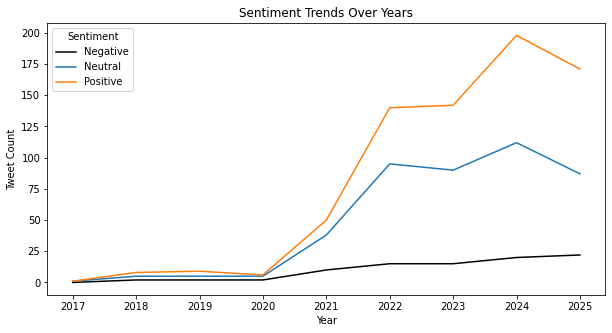

In [37]:
#Grouping year and sentiment
sentiment_trends = tweets.groupby(['Year', 'Sentiment']).size().unstack()

#Defining colors for the graph
colors = ['black', '#1f77b4', '#ff7f0e']  

#Plotting the graph
sentiment_trends.plot(kind='line', stacked=True, figsize=(10, 5), color=colors)
plt.title("Sentiment Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Tweet Count")
plt.legend(title="Sentiment")
plt.show()

- The sentiment trend analysis of CBC-related tweets from 2017 to 2025 shows a significant rise in positive and neutral sentiments starting around 2021, with positive sentiment peaking in 2024 before slightly declining. This suggests growing public engagement, possibly due to policy reforms or increased awareness. 

- Neutral sentiment follows a similar upward trend, indicating widespread discussions without strong opinions. Negative sentiment remains low but gradually increases, suggesting some concerns, though not as prominent as positive reactions. Overall, the data indicates increasing public discourse around CBC, with a generally favorable perception over time.

**9. To determine which sentiments gets more engagement**

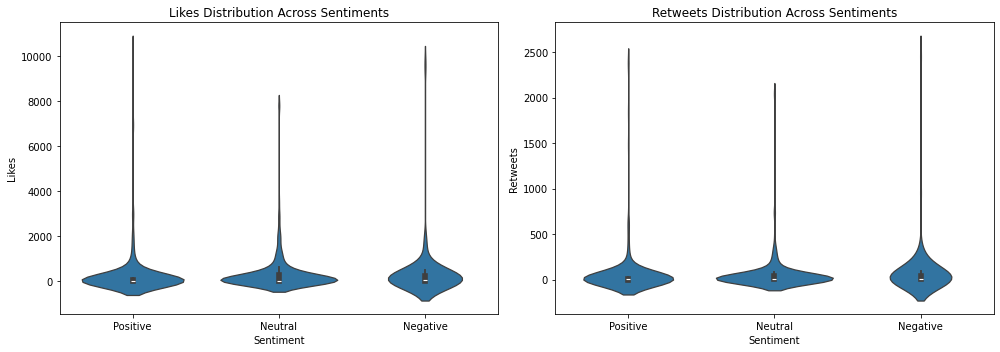

In [74]:
# Create a single figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

# Likes distribution
sns.violinplot(x='Sentiment', y='Likes', data=tweets, ax=axes[0])
axes[0].set_title("Likes Distribution Across Sentiments")

# Retweets distribution
sns.violinplot(x='Sentiment', y='Retweets', data=tweets, ax=axes[1])
axes[1].set_title("Retweets Distribution Across Sentiments")
plt.tight_layout()
plt.show()

 **Likes Distribution**
 
- The majority of tweets, regardless of sentiment, receive fewer likes (clustered around 0–500 likes).
- A few tweets have extremely high likes (outliers above 10,000), which suggests that some CBC-related tweets gained viral attention.
- The distribution is similar across all sentiments, meaning no clear preference for engagement based on sentiment alone.

**Retweets Distribution**

- Most tweets receive low retweets (clustered around 0–100).
- Some tweets have high retweet counts (above 2,500), indicating a few highly shared tweets.
- Again, the distribution across sentiments is quite similar, suggesting no strong sentiment bias in retweet activity.

Overall, sentiment does not seem to significantly affect engagement, as distributions look quite similar across Positive, Neutral, and Negative categories.


# Modelling

**10. To build and evaluate predictive models (Random Forest, XGBoost, and Logistic Regression) for sentiment classification, comparing their performance in accurately classifying CBC-related tweets.**

**Building the Models**

In [79]:
# Creating a copy of the dataset
tweets_encoded = tweets.copy()


# Defining features 
X = tweets_encoded["Text_Only"]  
y = tweets_encoded["Sentiment"]  


# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Encoding the sentiment labels
y_encoded = label_encoder.fit_transform(y)

# Converting text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_transformed = vectorizer.fit_transform(X)

#Checking for class Imbalance
tweets["Sentiment"].value_counts()

Neutral     350
Positive    287
Negative     88
Name: Sentiment, dtype: int64

The dataset presents to have a class imbalance, with Class 1 (Neutral) having 350 samples, Class 2 (Positive) having 287 samples and Class 0 (Negative)having Only 88 samples (underrepresented).To tackle this, we will use SMOTE (Synthetic Minority Oversampling Technique) to generate synthetic samples for class 0 (Negative) so all classes are balanced.

In [80]:
#Dealing with class Imbalance
from imblearn.over_sampling import SMOTE

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y_encoded, test_size=0.2, random_state=42)


# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check new class distribution
from collections import Counter
print("Balanced class distribution:", Counter(y_train_balanced))


Balanced class distribution: Counter({1: 281, 0: 281, 2: 281})


The target classes are now balanced as presented in the above output.

**Training the Models**

In [81]:
# Initializing the  models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
logreg = LogisticRegression(max_iter=1000)

# Training the models
rf.fit(X_train_balanced,  y_train_balanced )
xgb.fit(X_train_balanced,  y_train_balanced )
logreg.fit(X_train_balanced,  y_train_balanced )

# Predict
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
logreg_pred = logreg.predict(X_test)

# Evaluating performance
print("Random Forest:\n", classification_report(y_test, rf_pred))
print("XGBoost:\n", classification_report(y_test, xgb_pred))
print("Logistic Regression:\n", classification_report(y_test, logreg_pred))

Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.05      0.09        22
           1       0.58      0.77      0.66        69
           2       0.58      0.57      0.58        54

    accuracy                           0.59       145
   macro avg       0.72      0.46      0.44       145
weighted avg       0.65      0.59      0.54       145

XGBoost:
               precision    recall  f1-score   support

           0       0.42      0.23      0.29        22
           1       0.65      0.77      0.70        69
           2       0.67      0.63      0.65        54

    accuracy                           0.63       145
   macro avg       0.58      0.54      0.55       145
weighted avg       0.62      0.63      0.62       145

Logistic Regression:
               precision    recall  f1-score   support

           0       0.40      0.09      0.15        22
           1       0.58      0.71      0.64        69
           2       0.60    

**Random Forest**

- This model performs well for class 1 (Neutral) with a 77% recall, meaning it correctly identifies most neutral tweets but poorly predicts the Class 0 (Negative), with only 5% recall, meaning most negative tweets are misclassified.

- Overall, the accuracy is 59%, and the macro-average F1-score is low (0.44) due to the poor performance on class 0.

**XGBoost**

- This model Performs better than Random Forest, achieving 63% accuracy and better balance across all classes.However, Class 0 (Negative) still has low recall (23%), meaning many negative tweets are misclassified.

- Overall: The macro-average F1-score (0.55) shows a more balanced performance compared to Random Forest.

**Logistic Regression**

- This model Performs similarly to Random Forest, but slightly better for class 1 (Neutral) and class 2 (Positive). It however displays a Very poor recall for class 0 (Negative) at 9%, meaning it struggles to identify negative tweets.

- Overall: With 58% accuracy, it is slightly worse than XGBoost, and the macro-average F1-score (0.46) shows imbalance.

**In all the 3 models XGBoost is the best so far** with the highest accuracy & a balanced recall.


**Tuning Each Model**

We use GridsearchCV to find the best parameters for each model.

In [102]:
# Tuning Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='f1_macro')
rf_grid.fit(X_train_balanced,  y_train_balanced)
best_rf = rf_grid.best_estimator_
print(f"Random forest best parameters:{best_rf}")

# Tuning XGBoost
xgb_params = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), xgb_params, cv=3, scoring='f1_macro')
xgb_grid.fit(X_train_balanced,  y_train_balanced)
best_xgb = xgb_grid.best_estimator_
print(f"Xg boost best parameters:{best_xgb}")

#Tuning Logistic Regression
logreg_params = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}
logreg_grid = GridSearchCV(LogisticRegression(max_iter=1000), logreg_params, cv=3, scoring='f1_macro')
logreg_grid.fit(X_train_balanced,  y_train_balanced)
best_logreg = logreg_grid.best_estimator_
print(f"logistic regression best parameters:{best_logreg}")

Random forest best parameters:RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)
Xg boost best parameters:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)
logistic regression best parameters:LogisticRegression(C=1, max_iter=1000)


**Comparing the models after tuning**

In [103]:
from sklearn.metrics import f1_score

# Predicting using best models
rf_best_pred = best_rf.predict(X_test)
xgb_best_pred = best_xgb.predict(X_test)
logreg_best_pred = best_logreg.predict(X_test)

# Evaluating the models after tuning
rf_f1 = f1_score(y_test, rf_best_pred, average='macro')
xgb_f1 = f1_score(y_test, xgb_best_pred, average='macro')
logreg_f1 = f1_score(y_test, logreg_best_pred, average='macro')

# Print results
print(f"Random Forest F1-score: {rf_f1:.4f}")
print(f"XGBoost F1-score: {xgb_f1:.4f}")
print(f"Logistic Regression F1-score: {logreg_f1:.4f}")

# Print classification reports
print("\nBest Random Forest Model:\n", classification_report(y_test, rf_best_pred))
print("\nBest XGBoost Model:\n", classification_report(y_test, xgb_best_pred))
print("\nBest Logistic Regression Model:\n", classification_report(y_test, logreg_best_pred))

Random Forest F1-score: 0.4289
XGBoost F1-score: 0.5352
Logistic Regression F1-score: 0.4633

Best Random Forest Model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.61      0.77      0.68        69
           2       0.59      0.63      0.61        54

    accuracy                           0.60       145
   macro avg       0.40      0.47      0.43       145
weighted avg       0.51      0.60      0.55       145


Best XGBoost Model:
               precision    recall  f1-score   support

           0       0.25      0.14      0.18        22
           1       0.67      0.81      0.74        69
           2       0.72      0.67      0.69        54

    accuracy                           0.66       145
   macro avg       0.55      0.54      0.54       145
weighted avg       0.63      0.66      0.64       145


Best Logistic Regression Model:
               precision    recall  f1-score   support

      

**XGBoost**

- XGBoost performs the best among the models, achieving an F1-score of 0.5352.

- It balances precision and recall well, particularly for class 1 (Neutral) and class 2 (Positive).

**Random Forest**

- The model struggles with classifying class 0 (Negative) correctly, leading to an F1-score of 0.4289.

- Its recall is highest for class 1 (Neutral), meaning it predicts neutral tweets more accurately than other classes.

**Logistic Regression**

- The model performs moderately, with an F1-score of 0.4633, struggling with class 0 (Negative).

- It achieves relatively stable performance across classes but lacks the predictive strength of XGBoost

**Comparing the performance of the models using a Confusion Matrix**

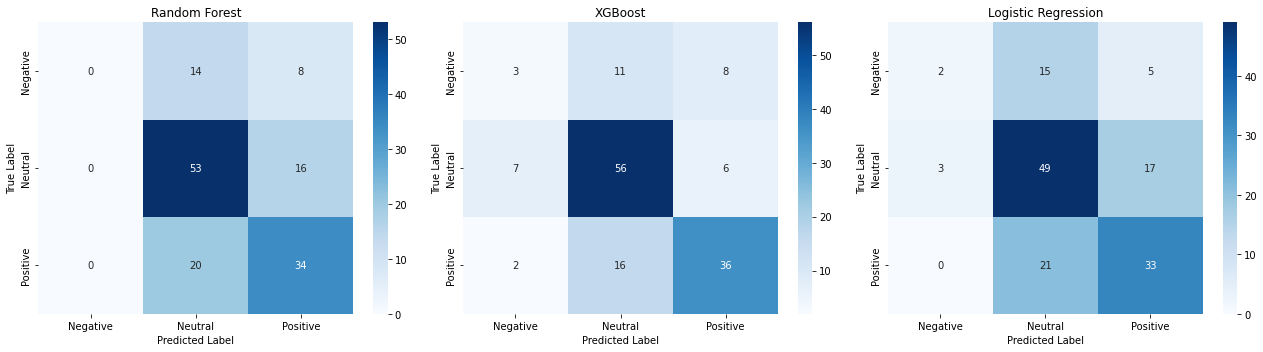

In [104]:
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_conf_matrix(ax, y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], 
                yticklabels=["Negative", "Neutral", "Positive"], ax=ax)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_title(f"{model_name}")

#Plotting confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_conf_matrix(axes[0], y_test, rf_best_pred, "Random Forest")
plot_conf_matrix(axes[1], y_test, xgb_best_pred, "XGBoost")
plot_conf_matrix(axes[2], y_test, logreg_best_pred, "Logistic Regression")

plt.tight_layout()
plt.show()

**Interpretation**

**1. Random Forest:** This model struggles to classify Negative cases correctly, predicting all as Neutral or Positive. It performs well on Neutral and Positive cases but misclassifies some Positive cases as Neutral.

**2. XGBoost:** This model shows better balance, with more accurate classifications for Neutral and Positive cases. However, it still misclassifies some Negative cases as Neutral or Positive.

**3. Logistic Regression:** This model struggles the most, misclassifying many Negative cases and showing lower accuracy for Neutral and Positive predictions compared to XGBoost.

#### Selecting the best Model

XGBoost presents to be the best-performing model for predicting CBC tweets, achieving a better balance in classifying all sentiment categories. Random Forest performs well for Neutral and Positive sentiments but struggles with Negative cases, while Logistic Regression has the highest misclassification rate across all categories.

In terms of the F1-score, XGBoost remains the top performer with an F1-score of 0.5352, indicating a stronger balance between precision and recall compared to the other models.

**11.To develop a chatbot that leverages TF-IDF and Cosine Similarity to match user queries with relevant responses, ensuring accurate and efficient query resolution**

**Building the model**

**Using TF-IDF + Cosine Similarity Approach**

TF-IDF (Term Frequency-Inverse Document Frequency) converts text into numeric vectors, while Cosine Similarity measures the similarity between query and response, helping match user queries with relevant responses in a chatbot.

In [53]:
# Initialize lemmatizer
lemmer = nltk.stem.WordNetLemmatizer()

# Text preprocessing with tokenization and lemmatization
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())  # Tokenization
    lemmatized_tokens = [lemmer.lemmatize(token) for token in tokens]  # Lemmatization
    return ' '.join(lemmatized_tokens)

# Applying preprocessing to the dataset
data['Question'] = data['Question'].apply(preprocess)

# Splitting data into train (70%) and test (30%)
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# TF-IDF Vectorization on training data
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(train_data['Question'])

# Function to get the best-matching answer
def get_answer(user_question):
    user_question = preprocess(user_question)  # Preprocess user input
    user_tfidf = vectorizer.transform([user_question])
    similarities = cosine_similarity(user_tfidf, tfidf_matrix)
    best_match_index = similarities.argmax()
    confidence = similarities[0][best_match_index]

    if confidence > 0.3:  # Confidence threshold
        return train_data['Answer'].iloc[best_match_index]
    else:
        return "I'm sorry, I couldn't find a relevant answer."

# Chatbot loop
print("Hello! Ask me anything. Type 'bye' to exit.")

while True:
    user_input = input("You: ")
    if user_input.lower() == 'bye':
        print("Bot: Goodbye!")
        break

    response = get_answer(user_input)
    print(f"Bot: {response}")


Hello! Ask me anything. Type 'bye' to exit.
You: what is cbc
Bot: CBC  stands for "Competency-Based Curriculum," a system of education implemented in Kenya that aims to equip learners with essential skills beyond just academic knowledge, focusing on competencies like critical thinking, collaboration, and creativity
You: what is ccba
Bot: CBC  stands for "Competency-Based Curriculum," a system of education implemented in Kenya that aims to equip learners with essential skills beyond just academic knowledge, focusing on competencies like critical thinking, collaboration, and creativity
You: is it costly
Bot: CBC is costlier than 8-4-4 due to increased resource demands, learning materials, and teacher training requirements.
You: what subjects are taught
Bot: CBC offers a diverse curriculum including sciences, humanities, technical subjects, and creative arts.
You: what subjects are taught at pp1
Bot: CBC offers a diverse curriculum including sciences, humanities, technical subjects, and c

**Evaluating the Model**

**1. Classification report**

In [70]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate on test set
true_answers = []
predicted_answers = []

for _, row in test_data.iterrows():
    question = row['Question']
    true_answers.append(row['Answer'])
    predicted_answers.append(get_answer(question))

# Evaluate performance
accuracy = accuracy_score(true_answers, predicted_answers)
precision = precision_score(true_answers, predicted_answers, average='weighted', zero_division=0)
recall = recall_score(true_answers, predicted_answers, average='weighted', zero_division=0)
f1 = f1_score(true_answers, predicted_answers, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.01
Precision: 0.01
Recall: 0.01
F1 Score: 0.01


 **Mean Reciprocal Rank (MRR)**
 
Evaluates how close the correct answer is in ranked results.

In [56]:
def mean_reciprocal_rank(y_true, y_pred):
    ranks = []
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            ranks.append(1)
        else:
            ranks.append(0)
    return sum(ranks) / len(ranks)

mrr = mean_reciprocal_rank(true_answers, predicted_answers)
print(f"Mean Reciprocal Rank (MRR): {mrr:.2f}")


Mean Reciprocal Rank (MRR): 0.01


An MRR of 0.01 indicates very poor performance, meaning the correct answers usually appear far down the ranking list. Ideally, an MRR close to 1.0 suggests the correct answer is often the top result. To improve this score, we would enhance preprocessing and adjust the similarity threshold.

**Cosine Similarity Distribution**

Visualize similarity scores for predictions.

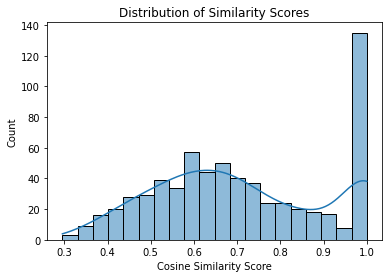

In [57]:
import seaborn as sns

similarity_scores = [cosine_similarity(vectorizer.transform([q]), tfidf_matrix).max() for q in test_data['Question']]

sns.histplot(similarity_scores, bins=20, kde=True)
plt.xlabel("Cosine Similarity Score")
plt.title("Distribution of Similarity Scores")
plt.show()

The distribution suggests that while the model identifies some relevant matches, the sharp peak near 1.0 indicates potential overfitting. The weak matches in the 0.3–0.5 range highlight the need for a higher confidence threshold. To improve accuracy,  adjusting the threshold to around 0.6–0.7 for partial matches would lead to more reliable predictions.

**Tuning the Model**

In [67]:
# Initialize lemmatizer
lemmer = nltk.stem.WordNetLemmatizer()

# Text preprocessing with tokenization and lemmatization
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())  # Tokenization
    lemmatized_tokens = [lemmer.lemmatize(token) for token in tokens]  # Lemmatization
    return ' '.join(lemmatized_tokens)

# Apply preprocessing to the dataset
data['Question'] = data['Question'].apply(preprocess)

# Split data into train (70%) and test (30%)
train_data1, test_data1 = train_test_split(data, test_size=0.3, random_state=42)

# TF-IDF Vectorization on training data
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(train_data1['Question'])

# Function to get the best-matching answer
def get_answer(user_question):
    user_question = preprocess(user_question)  # Preprocess user input
    user_tfidf = vectorizer.transform([user_question])
    similarities = cosine_similarity(user_tfidf, tfidf_matrix)
    best_match_index = similarities.argmax()
    confidence = similarities[0][best_match_index]

    if confidence > 0.6:  # Confidence threshold
        return train_data1['Answer'].iloc[best_match_index]
    else:
        return "I'm sorry, I couldn't find a relevant answer."

# Chatbot loop
print("Hello! Ask me anything. Type 'bye' to exit.")

while True:
    user_input = input("You: ")
    if user_input.lower() == 'bye':
        print("Bot: Goodbye!")
        break

    response = get_answer(user_input)
    print(f"Bot: {response}")


Hello! Ask me anything. Type 'bye' to exit.
You: cbc
Bot: CBC  stands for "Competency-Based Curriculum," a system of education implemented in Kenya that aims to equip learners with essential skills beyond just academic knowledge, focusing on competencies like critical thinking, collaboration, and creativity
You: cba
Bot: Competency-Based Assessment (CBA) is an evaluation approach in CBC that focuses on measuring learners' skills, knowledge, and competencies through continuous, practical, and formative assessments rather than relying solely on traditional exams.
You: fees
Bot: CBC school fees vary depending on the school, grade level, and whether lunch is included.
You: university
Bot: The CBC education structure follows a 2-6-3-3-3 system. Learners spend two years in pre-primary, six in primary, three in junior secondary, and three in senior secondary before joining university for at least three years.
You: expensive
Bot: Yes, CBC requires more resources, learning materials, and specia

**Evaluating the Tuned model**

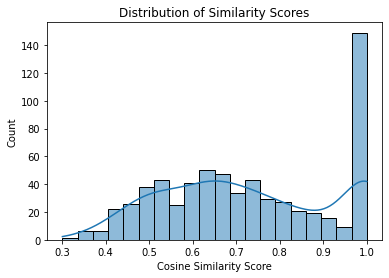

In [68]:
#Extracting similarity scores
similarity_scores = [cosine_similarity(vectorizer.transform([q]), tfidf_matrix).max() for q in test_data1['Question']]

sns.histplot(similarity_scores, bins=20, kde=True)
plt.xlabel("Cosine Similarity Score")
plt.title("Distribution of Similarity Scores")
plt.show()

In [71]:

# Evaluate on test set
true_answers = []
predicted_answers = []

for _, row in test_data1.iterrows():
    question = row['Question']
    true_answers.append(row['Answer'])
    predicted_answers.append(get_answer(question))

# Evaluate performance
accuracy = accuracy_score(true_answers, predicted_answers)
precision = precision_score(true_answers, predicted_answers, average='weighted', zero_division=0)
recall = recall_score(true_answers, predicted_answers, average='weighted', zero_division=0)
f1 = f1_score(true_answers, predicted_answers, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.01
Precision: 0.01
Recall: 0.01
F1 Score: 0.01
